In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.drop(['ID'],axis=1,inplace=True)

In [4]:
df.shape

(418, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


## Checking for percentage of null data in each column

In [7]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

## Checking for duplicate data

In [8]:
df[df.duplicated()]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


## Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


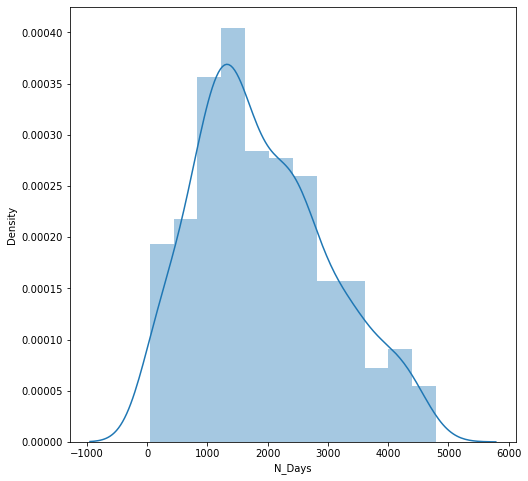

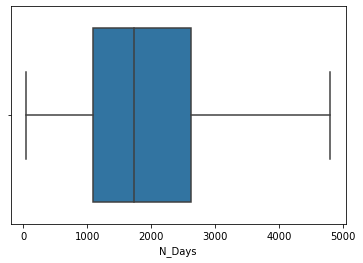

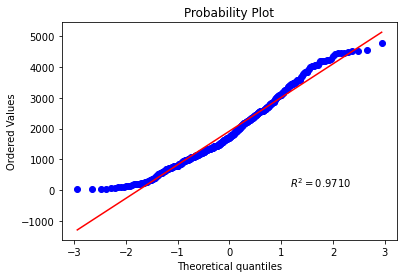

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


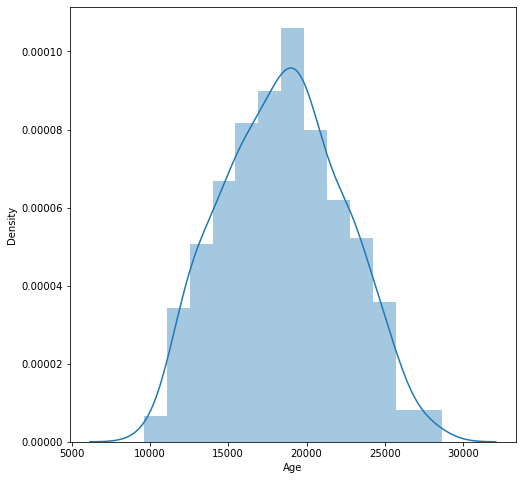

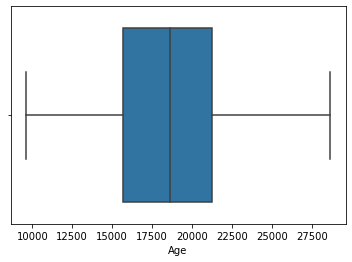

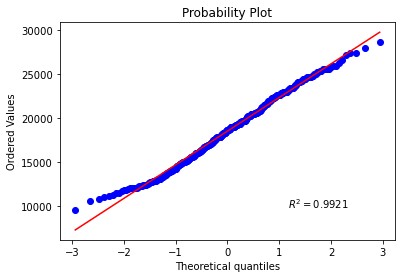

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


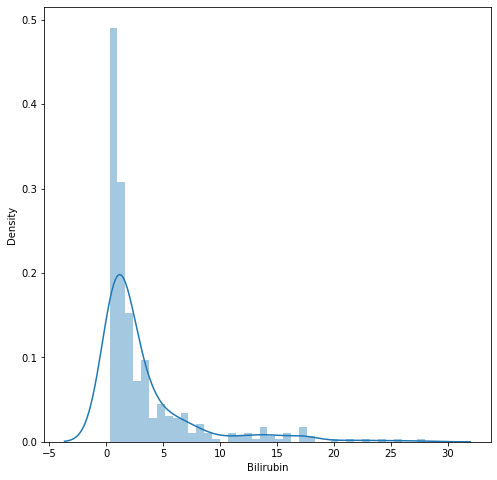

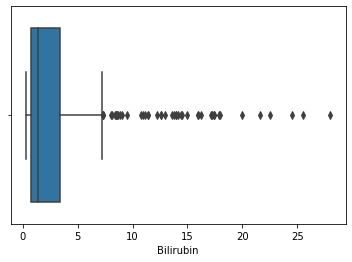

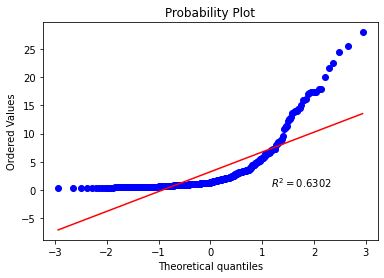

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


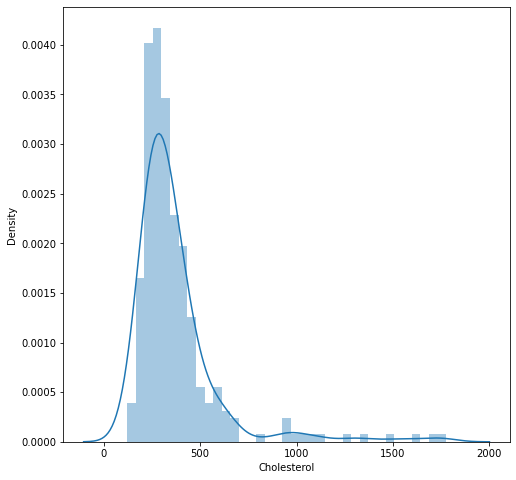

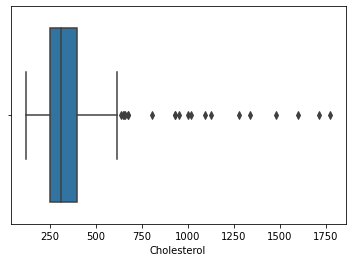

posx and posy should be finite values
posx and posy should be finite values


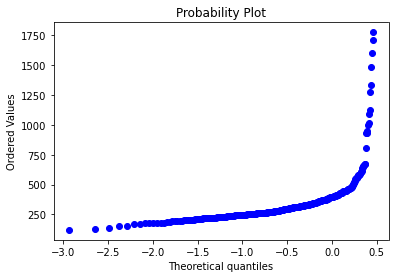

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


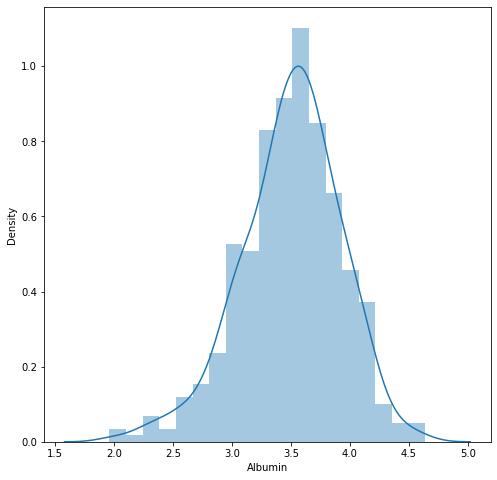

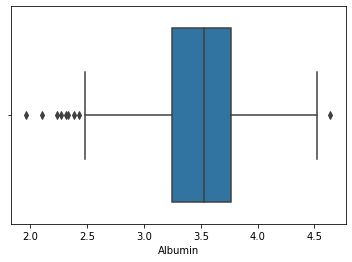

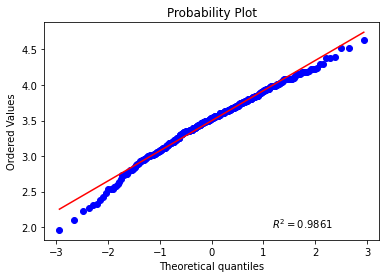

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


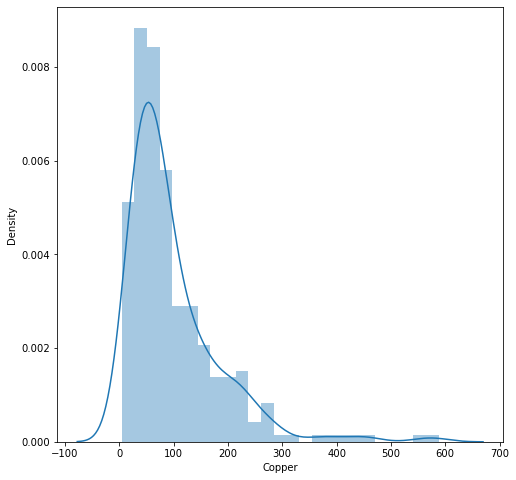

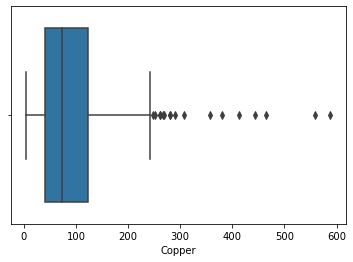

posx and posy should be finite values
posx and posy should be finite values


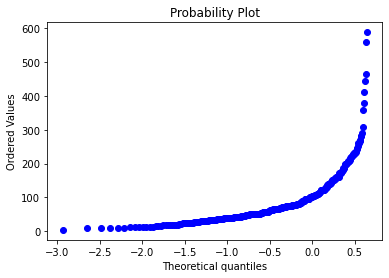

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


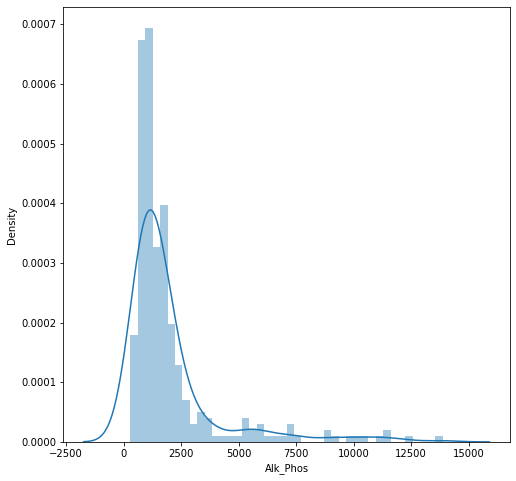

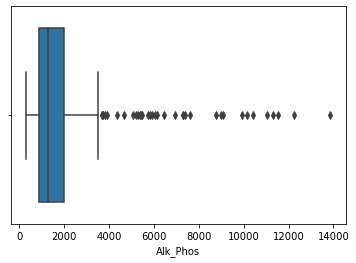

posx and posy should be finite values
posx and posy should be finite values


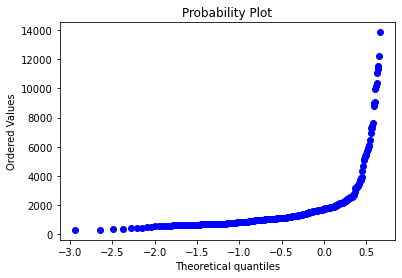

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


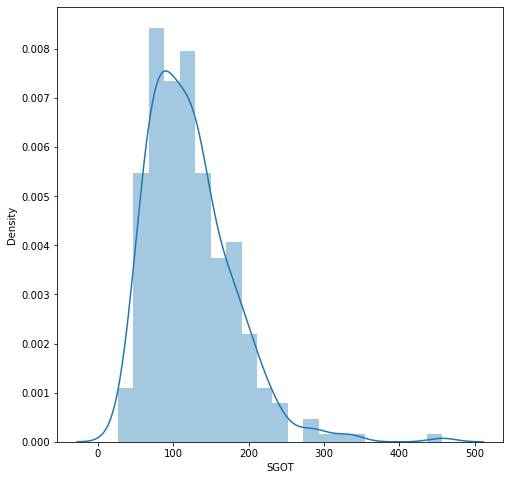

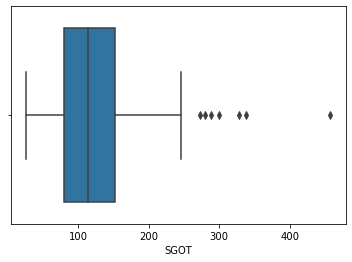

posx and posy should be finite values
posx and posy should be finite values


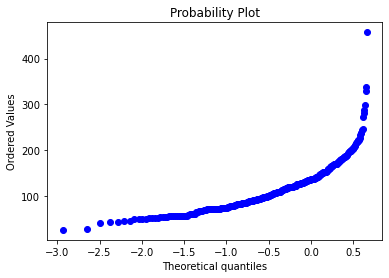

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


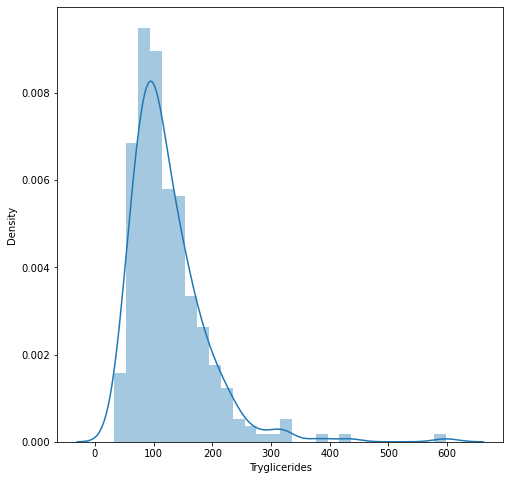

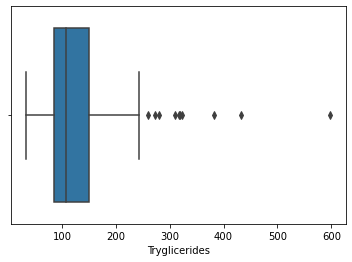

posx and posy should be finite values
posx and posy should be finite values


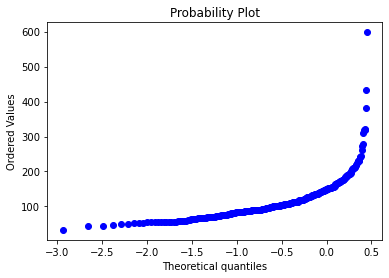

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


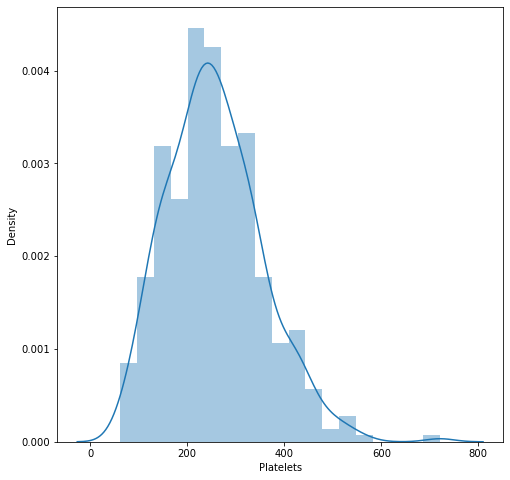

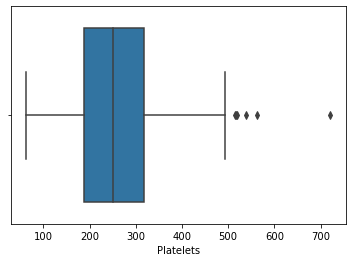

posx and posy should be finite values
posx and posy should be finite values


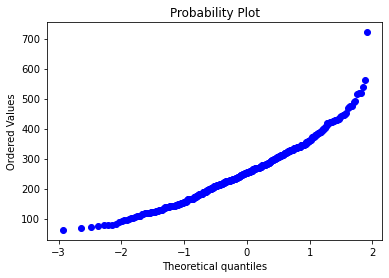

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


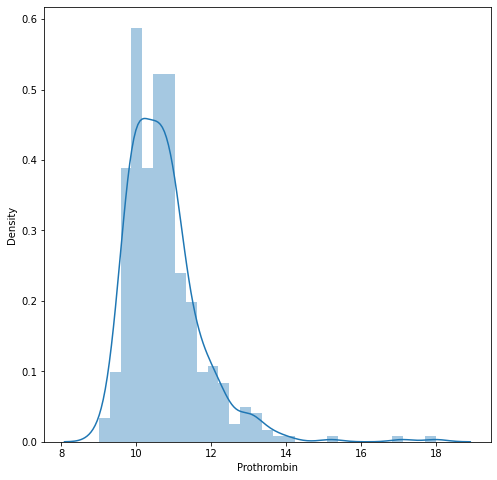

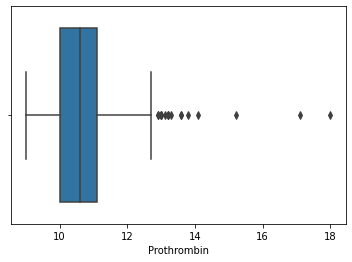

posx and posy should be finite values
posx and posy should be finite values


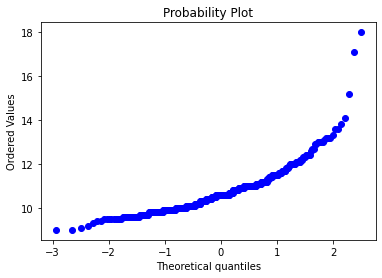

----------------------------


In [9]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [10]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

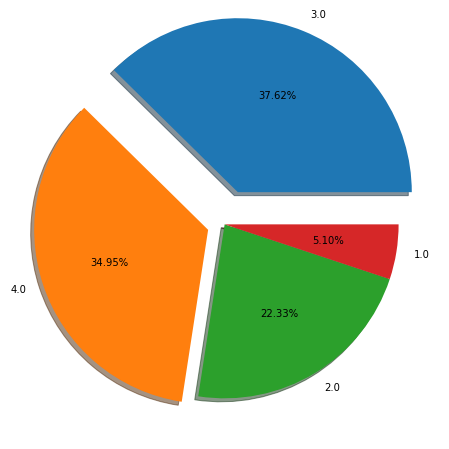

In [11]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

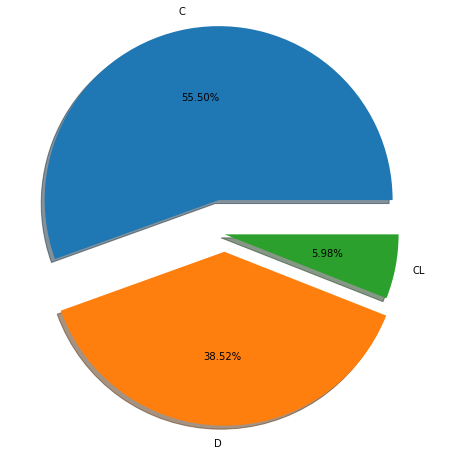

In [12]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

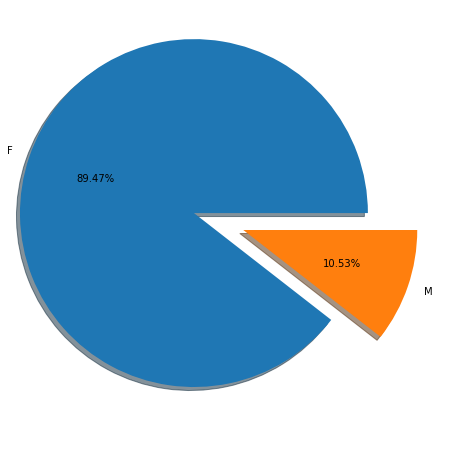

In [13]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

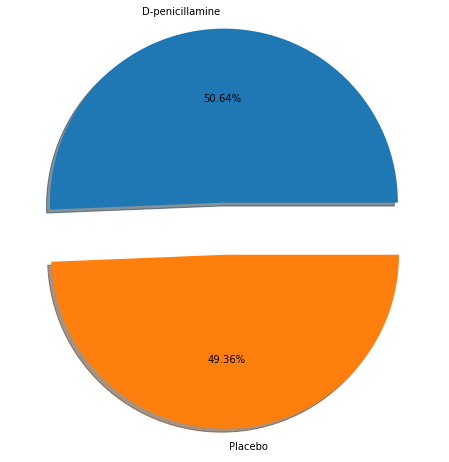

In [14]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

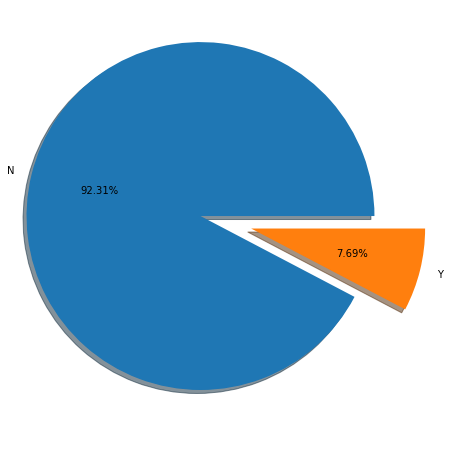

In [15]:
pie_chart(df,'Ascites')

## Only a tiny fraction of the population of patients had Ascites disease.

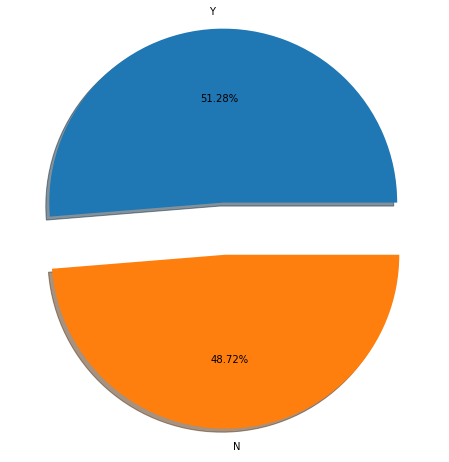

In [16]:
pie_chart(df,'Hepatomegaly')

## The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

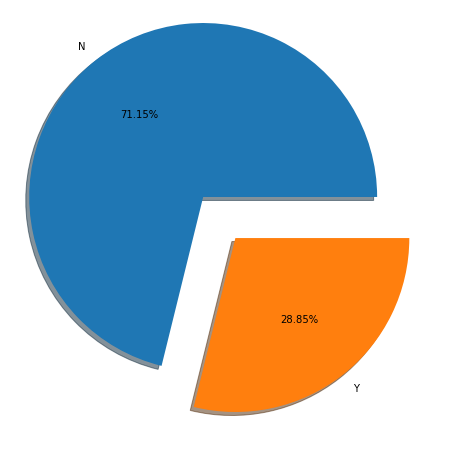

In [17]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

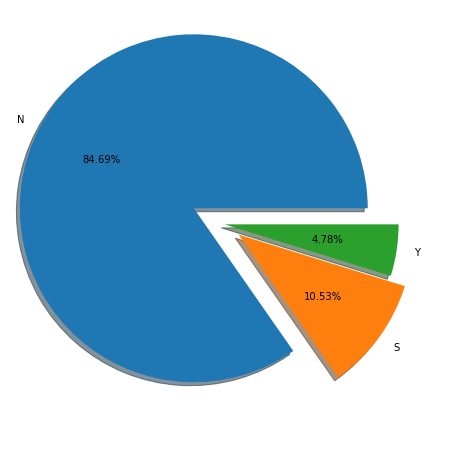

In [18]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of 
just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

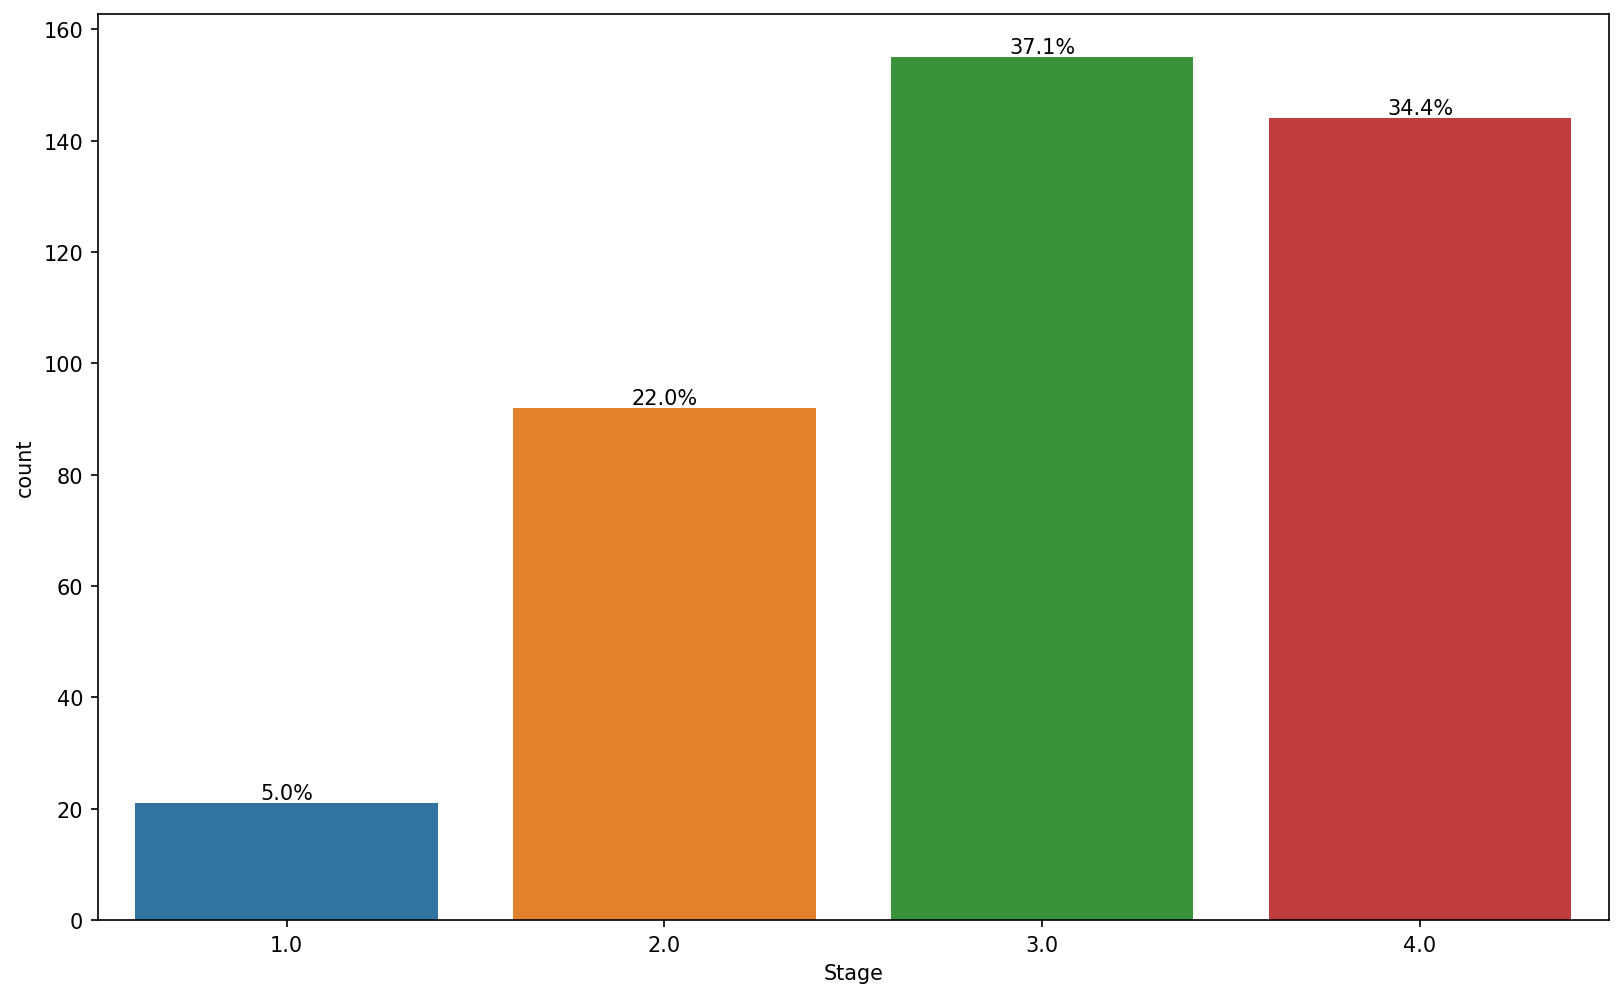

In [19]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class. 

## Bivariate Analysis

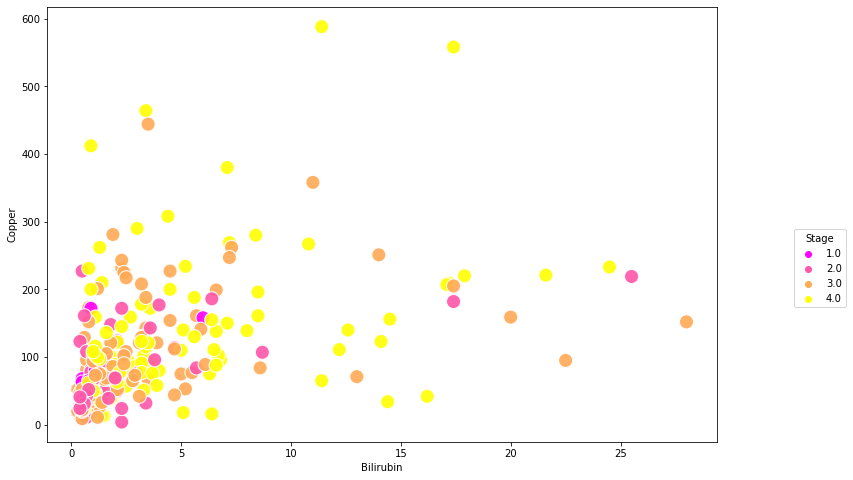

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [21]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [22]:
males.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,44.000000,44.000000,44.000000,35.000000,44.000000,36.000000,36.000000,36.000000,35.000000,43.000000,44.000000,44.000000
mean,1894.022727,20348.340909,2.865909,362.457143,3.535000,154.277778,2172.950000,121.990556,133.428571,231.139535,10.940909,3.068182
std,1213.034356,4009.641699,2.319477,178.993319,0.456598,100.665389,2418.446239,47.013095,52.168441,85.225634,0.931445,0.925045
min,140.000000,12227.000000,0.600000,151.000000,2.270000,13.000000,516.000000,46.500000,49.000000,70.000000,9.700000,1.000000
25%,1060.750000,17886.000000,1.300000,245.000000,3.327500,80.750000,852.000000,82.770000,91.000000,165.500000,10.275000,2.750000
50%,1507.000000,19724.000000,2.050000,317.000000,3.645000,134.500000,1116.000000,121.675000,126.000000,217.000000,10.900000,3.000000
75%,2715.750000,23588.750000,3.500000,426.500000,3.870000,211.750000,2313.000000,153.450000,163.000000,298.500000,11.225000,4.000000
max,4459.000000,28650.000000,9.500000,1000.000000,4.300000,444.000000,10396.800000,221.880000,242.000000,394.000000,14.100000,4.000000


In [23]:
females.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,374.000000,374.000000,374.000000,249.000000,374.000000,274.000000,276.000000,276.000000,247.000000,364.000000,372.000000,368.000000
mean,1920.577540,18319.823529,3.262567,370.502008,3.493021,90.208029,1957.834783,122.630145,123.465587,260.082418,10.706989,3.019022
std,1092.953174,3740.397415,4.591388,238.726563,0.421527,80.738377,2105.049047,57.916646,66.780963,99.418385,1.030534,0.877926
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1095.500000,15478.750000,0.700000,252.000000,3.240000,40.000000,877.500000,80.600000,84.000000,190.000000,10.000000,2.000000
50%,1773.000000,18333.000000,1.300000,309.000000,3.520000,67.000000,1270.500000,113.335000,106.000000,252.500000,10.600000,3.000000
75%,2606.250000,20819.000000,3.400000,395.000000,3.767500,111.750000,1963.750000,151.900000,146.000000,319.000000,11.100000,4.000000
max,4795.000000,28018.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [24]:
round(males.Status.value_counts() / len(males) * 100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [25]:
round(females.Status.value_counts() / len(females) * 100,2)

C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [26]:
round(males.Stage.value_counts() / len(males) * 100,2)

4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: Stage, dtype: float64

In [27]:
round(females.Stage.value_counts() / len(females) * 100,2)

3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [28]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Y    47.73
N    34.09
Name: Hepatomegaly, dtype: float64

In [29]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

Male patients are more likely to suffer from Hepatomegaly disease in comparison to female patients.

## Multivariate Analysis

<AxesSubplot:>

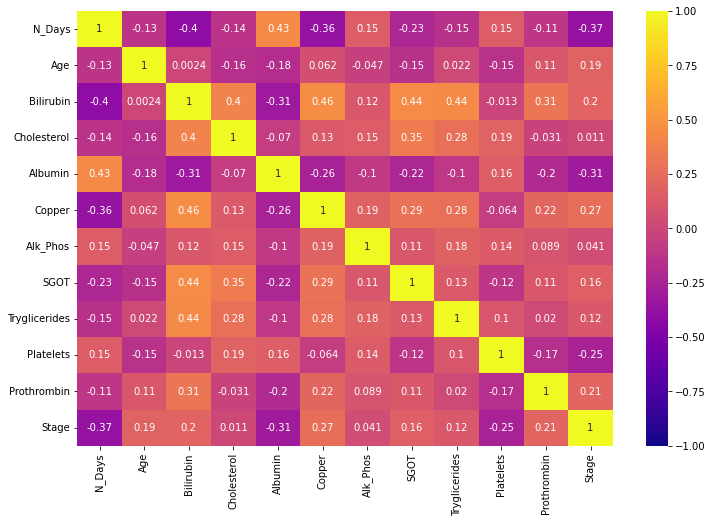

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

There are no major correlations between any pair of features in the dataset.

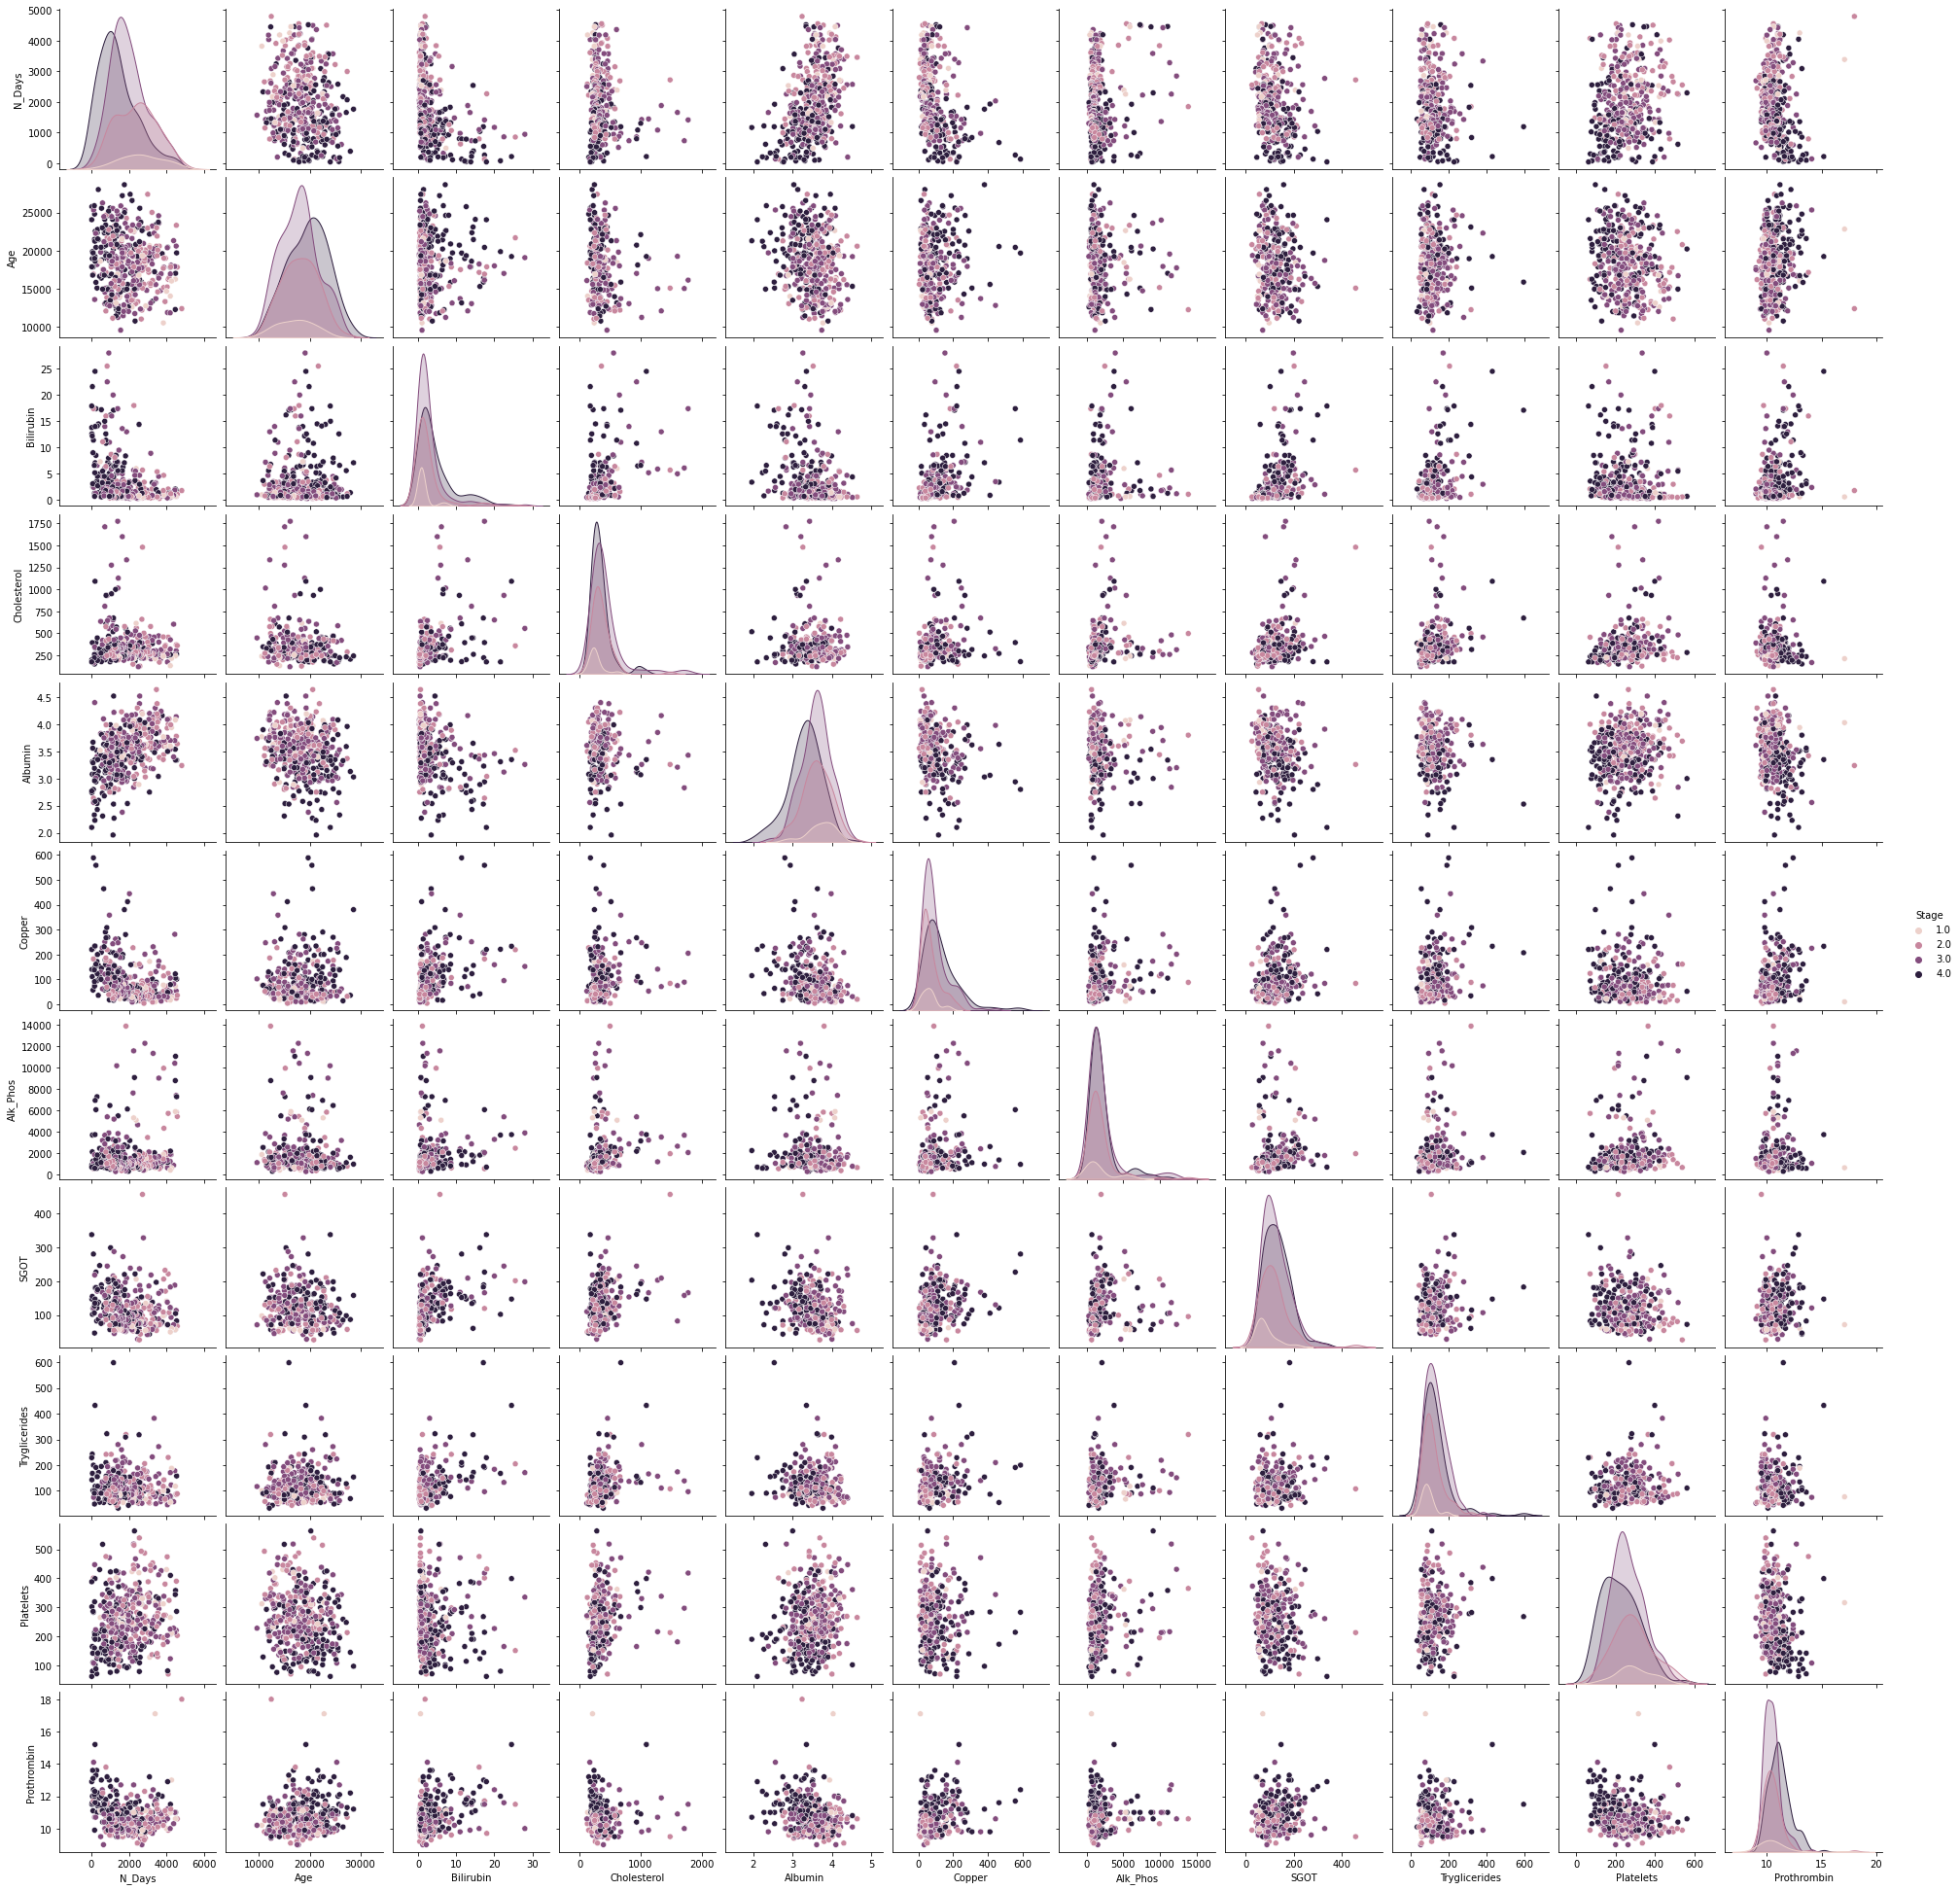

In [31]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

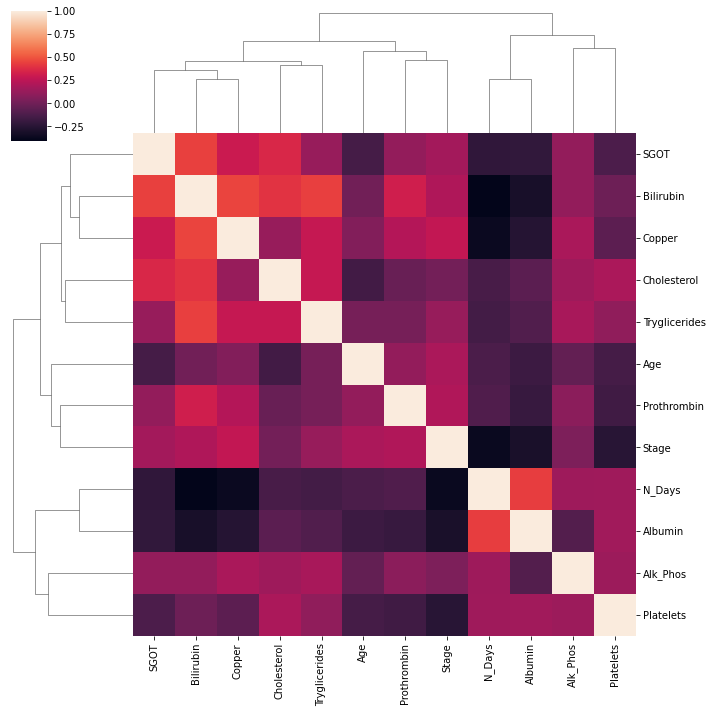

In [32]:
sns.clustermap(df.corr())

## Feature Engineering

In [33]:
df.Age = (df.Age.values/365.0).round()
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Imputation of missing values

In [34]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

### Treatment of outliers

In [35]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

### Encoding of categorical features

In [36]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [37]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

## Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [38]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

<AxesSubplot:xlabel='Stage', ylabel='count'>

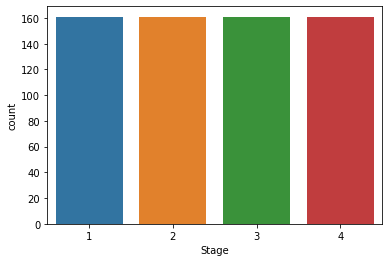

In [39]:
sns.countplot(y)

## Feature Scaling

In [40]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.734123,0.963247,-0.382290,4.983321,0.959091,2.277051,3.172958,2.421042,-0.697042,-2.491737,1.912033,0.547791,0.679910,2.055591,-0.879940,1.979878
1,-0.734123,0.650533,-0.382290,-0.207707,0.959091,2.277051,0.161855,-0.508064,-0.111256,1.515370,-0.534233,2.139974,0.046858,-0.667085,-0.530631,-0.035867
2,-0.734123,2.109867,2.964142,-0.207707,-1.112588,-0.464421,-2.849247,-0.366333,-1.911477,-0.201961,2.367710,-1.315698,-0.404545,-1.736707,-1.319392,1.727910
3,-0.734123,0.546295,-0.382290,-0.207707,0.959091,2.277051,-2.849247,-0.177359,-0.939929,-2.647858,-0.294403,2.139974,-1.323676,-0.537434,-0.958816,-0.413819
4,1.516276,-1.225754,-0.382290,-0.207707,0.959091,2.277051,0.161855,0.578540,-0.439868,-0.071860,1.600254,-1.075398,0.037270,-1.185690,-1.488412,0.342085


## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.53      0.64      0.58        50
           2       0.37      0.29      0.32        52
           3       0.37      0.46      0.41        39
           4       0.75      0.62      0.68        53

    accuracy                           0.51       194
   macro avg       0.50      0.50      0.50       194
weighted avg       0.51      0.51      0.50       194



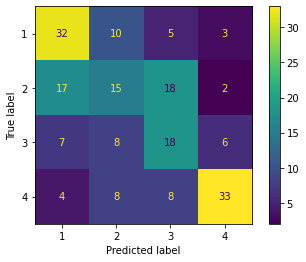

In [44]:
plot_confusion_matrix(logmodel,X_test,y_test)

In [45]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [46]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.65      0.96      0.77        50
           2       0.69      0.48      0.57        52
           3       0.40      0.44      0.42        39
           4       0.64      0.51      0.57        53

    accuracy                           0.60       194
   macro avg       0.60      0.60      0.58       194
weighted avg       0.61      0.60      0.59       194



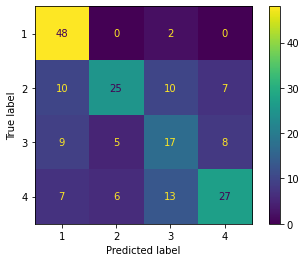

In [47]:
plot_confusion_matrix(svm,X_test,y_test)

In [48]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

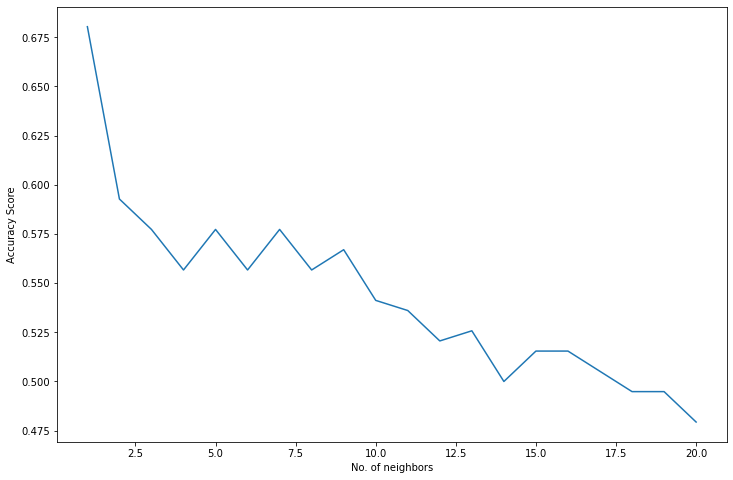

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[43  4  3  0]
 [23 19  7  3]
 [10  8 13  8]
 [11  5 14 23]]
              precision    recall  f1-score   support

           1       0.49      0.86      0.63        50
           2       0.53      0.37      0.43        52
           3       0.35      0.33      0.34        39
           4       0.68      0.43      0.53        53

    accuracy                           0.51       194
   macro avg       0.51      0.50      0.48       194
weighted avg       0.52      0.51      0.49       194



In [52]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [53]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[21 25  1  3]
 [11 27 10  4]
 [ 5 15 13  6]
 [ 3 10 13 27]]
              precision    recall  f1-score   support

           1       0.53      0.42      0.47        50
           2       0.35      0.52      0.42        52
           3       0.35      0.33      0.34        39
           4       0.68      0.51      0.58        53

    accuracy                           0.45       194
   macro avg       0.48      0.45      0.45       194
weighted avg       0.48      0.45      0.46       194



In [54]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [55]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[33  2  6  9]
 [23  7 14  8]
 [13  2 17  7]
 [ 9  2 15 27]]
              precision    recall  f1-score   support

           1       0.42      0.66      0.52        50
           2       0.54      0.13      0.22        52
           3       0.33      0.44      0.37        39
           4       0.53      0.51      0.52        53

    accuracy                           0.43       194
   macro avg       0.45      0.43      0.41       194
weighted avg       0.46      0.43      0.41       194



In [56]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [57]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[36  6  3  5]
 [21 10 15  6]
 [10  6 16  7]
 [ 5  6 11 31]]
              precision    recall  f1-score   support

           1       0.50      0.72      0.59        50
           2       0.36      0.19      0.25        52
           3       0.36      0.41      0.38        39
           4       0.63      0.58      0.61        53

    accuracy                           0.48       194
   macro avg       0.46      0.48      0.46       194
weighted avg       0.47      0.48      0.46       194



In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[43  3  4  0]
 [ 6 20 12 14]
 [ 8  5 18  8]
 [ 5  6 14 28]]
              precision    recall  f1-score   support

           1       0.69      0.86      0.77        50
           2       0.59      0.38      0.47        52
           3       0.38      0.46      0.41        39
           4       0.56      0.53      0.54        53

    accuracy                           0.56       194
   macro avg       0.55      0.56      0.55       194
weighted avg       0.56      0.56      0.55       194



In [60]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

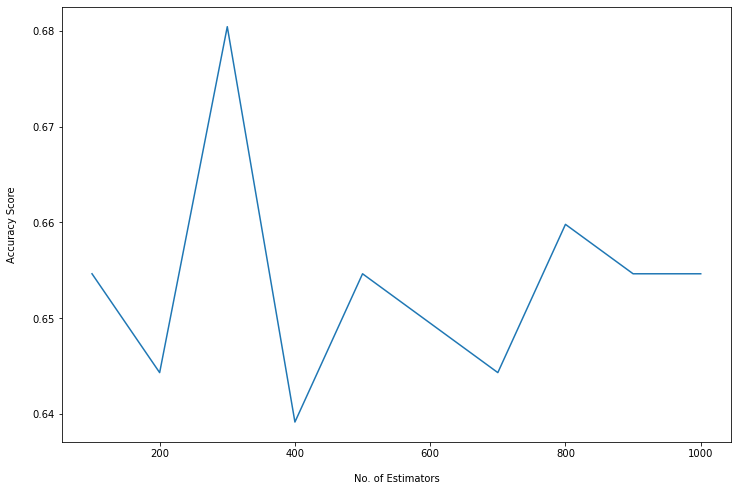

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [62]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[47  0  2  1]
 [ 6 30 11  5]
 [ 7  4 21  7]
 [ 2  6 17 28]]
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        50
           2       0.75      0.58      0.65        52
           3       0.41      0.54      0.47        39
           4       0.68      0.53      0.60        53

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.64       194
weighted avg       0.67      0.65      0.65       194



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

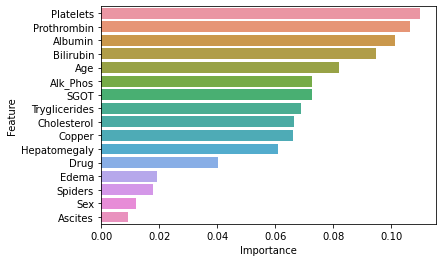

In [64]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

In [65]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[47  1  1  1]
 [ 7 32  9  4]
 [ 5  7 20  7]
 [ 1  4 18 30]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        50
           2       0.73      0.62      0.67        52
           3       0.42      0.51      0.46        39
           4       0.71      0.57      0.63        53

    accuracy                           0.66       194
   macro avg       0.66      0.66      0.65       194
weighted avg       0.68      0.66      0.66       194



In [67]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[[33 14  3  0]
 [14 18 14  6]
 [ 4 16  8 11]
 [ 1 10 16 26]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65        50
           2       0.31      0.35      0.33        52
           3       0.20      0.21      0.20        39
           4       0.60      0.49      0.54        53

    accuracy                           0.44       194
   macro avg       0.44      0.43      0.43       194
weighted avg       0.45      0.44      0.44       194



In [69]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.075969
0:	learn: 1.3578758	total: 181ms	remaining: 3m 1s
1:	learn: 1.3325306	total: 188ms	remaining: 1m 33s
2:	learn: 1.3138694	total: 195ms	remaining: 1m 4s
3:	learn: 1.2915028	total: 200ms	remaining: 49.9s
4:	learn: 1.2676793	total: 206ms	remaining: 41s
5:	learn: 1.2489312	total: 212ms	remaining: 35.1s
6:	learn: 1.2316358	total: 218ms	remaining: 30.9s
7:	learn: 1.2106926	total: 223ms	remaining: 27.7s
8:	learn: 1.1896775	total: 229ms	remaining: 25.2s
9:	learn: 1.1724982	total: 234ms	remaining: 23.2s
10:	learn: 1.1574604	total: 240ms	remaining: 21.6s
11:	learn: 1.1390180	total: 246ms	remaining: 20.3s
12:	learn: 1.1252521	total: 252ms	remaining: 19.1s
13:	learn: 1.1157054	total: 257ms	remaining: 18.1s
14:	learn: 1.0992312	total: 263ms	remaining: 17.3s
15:	learn: 1.0853755	total: 268ms	remaining: 16.5s
16:	learn: 1.0724082	total: 275ms	remaining: 15.9s
17:	learn: 1.0582688	total: 281ms	remaining: 15.3s
18:	learn: 1.0464924	total: 287ms	remaining: 14.8s
19:	learn: 1

192:	learn: 0.3682529	total: 1.27s	remaining: 5.32s
193:	learn: 0.3668251	total: 1.28s	remaining: 5.32s
194:	learn: 0.3657587	total: 1.29s	remaining: 5.31s
195:	learn: 0.3647619	total: 1.29s	remaining: 5.3s
196:	learn: 0.3625503	total: 1.3s	remaining: 5.29s
197:	learn: 0.3609210	total: 1.3s	remaining: 5.29s
198:	learn: 0.3593631	total: 1.31s	remaining: 5.27s
199:	learn: 0.3576766	total: 1.32s	remaining: 5.26s
200:	learn: 0.3564217	total: 1.32s	remaining: 5.25s
201:	learn: 0.3551909	total: 1.33s	remaining: 5.25s
202:	learn: 0.3540653	total: 1.34s	remaining: 5.25s
203:	learn: 0.3524841	total: 1.34s	remaining: 5.24s
204:	learn: 0.3507884	total: 1.35s	remaining: 5.23s
205:	learn: 0.3484981	total: 1.35s	remaining: 5.22s
206:	learn: 0.3469612	total: 1.36s	remaining: 5.21s
207:	learn: 0.3455440	total: 1.37s	remaining: 5.21s
208:	learn: 0.3442786	total: 1.37s	remaining: 5.2s
209:	learn: 0.3432061	total: 1.38s	remaining: 5.19s
210:	learn: 0.3415531	total: 1.38s	remaining: 5.18s
211:	learn: 0.34

352:	learn: 0.1989669	total: 2.18s	remaining: 4s
353:	learn: 0.1981155	total: 2.19s	remaining: 3.99s
354:	learn: 0.1975495	total: 2.19s	remaining: 3.98s
355:	learn: 0.1966550	total: 2.2s	remaining: 3.97s
356:	learn: 0.1961154	total: 2.2s	remaining: 3.97s
357:	learn: 0.1951788	total: 2.21s	remaining: 3.96s
358:	learn: 0.1946776	total: 2.21s	remaining: 3.95s
359:	learn: 0.1939360	total: 2.22s	remaining: 3.95s
360:	learn: 0.1931392	total: 2.23s	remaining: 3.94s
361:	learn: 0.1923664	total: 2.23s	remaining: 3.94s
362:	learn: 0.1918177	total: 2.24s	remaining: 3.93s
363:	learn: 0.1912778	total: 2.24s	remaining: 3.92s
364:	learn: 0.1906401	total: 2.25s	remaining: 3.92s
365:	learn: 0.1900004	total: 2.25s	remaining: 3.91s
366:	learn: 0.1891811	total: 2.26s	remaining: 3.9s
367:	learn: 0.1887119	total: 2.27s	remaining: 3.89s
368:	learn: 0.1879902	total: 2.27s	remaining: 3.89s
369:	learn: 0.1876149	total: 2.28s	remaining: 3.88s
370:	learn: 0.1867817	total: 2.29s	remaining: 3.87s
371:	learn: 0.1860

517:	learn: 0.1224678	total: 3.08s	remaining: 2.87s
518:	learn: 0.1222667	total: 3.09s	remaining: 2.86s
519:	learn: 0.1220045	total: 3.1s	remaining: 2.86s
520:	learn: 0.1216124	total: 3.1s	remaining: 2.85s
521:	learn: 0.1213667	total: 3.11s	remaining: 2.85s
522:	learn: 0.1209145	total: 3.11s	remaining: 2.84s
523:	learn: 0.1205373	total: 3.12s	remaining: 2.83s
524:	learn: 0.1203771	total: 3.12s	remaining: 2.83s
525:	learn: 0.1200816	total: 3.13s	remaining: 2.82s
526:	learn: 0.1195880	total: 3.13s	remaining: 2.81s
527:	learn: 0.1193361	total: 3.14s	remaining: 2.81s
528:	learn: 0.1191280	total: 3.15s	remaining: 2.8s
529:	learn: 0.1187010	total: 3.15s	remaining: 2.8s
530:	learn: 0.1183290	total: 3.16s	remaining: 2.79s
531:	learn: 0.1181527	total: 3.17s	remaining: 2.78s
532:	learn: 0.1177937	total: 3.17s	remaining: 2.78s
533:	learn: 0.1174088	total: 3.18s	remaining: 2.77s
534:	learn: 0.1171717	total: 3.18s	remaining: 2.77s
535:	learn: 0.1169866	total: 3.19s	remaining: 2.76s
536:	learn: 0.11

681:	learn: 0.0845183	total: 3.99s	remaining: 1.86s
682:	learn: 0.0843961	total: 4s	remaining: 1.85s
683:	learn: 0.0842303	total: 4s	remaining: 1.85s
684:	learn: 0.0840715	total: 4.01s	remaining: 1.84s
685:	learn: 0.0838085	total: 4.01s	remaining: 1.84s
686:	learn: 0.0836272	total: 4.02s	remaining: 1.83s
687:	learn: 0.0835208	total: 4.02s	remaining: 1.82s
688:	learn: 0.0834146	total: 4.03s	remaining: 1.82s
689:	learn: 0.0832329	total: 4.03s	remaining: 1.81s
690:	learn: 0.0830233	total: 4.04s	remaining: 1.8s
691:	learn: 0.0828327	total: 4.04s	remaining: 1.8s
692:	learn: 0.0825682	total: 4.05s	remaining: 1.79s
693:	learn: 0.0823794	total: 4.05s	remaining: 1.79s
694:	learn: 0.0821515	total: 4.06s	remaining: 1.78s
695:	learn: 0.0819870	total: 4.06s	remaining: 1.77s
696:	learn: 0.0818019	total: 4.07s	remaining: 1.77s
697:	learn: 0.0815859	total: 4.08s	remaining: 1.76s
698:	learn: 0.0813994	total: 4.08s	remaining: 1.76s
699:	learn: 0.0812895	total: 4.08s	remaining: 1.75s
700:	learn: 0.081201

852:	learn: 0.0616642	total: 5.32s	remaining: 916ms
853:	learn: 0.0615633	total: 5.33s	remaining: 911ms
854:	learn: 0.0614775	total: 5.34s	remaining: 905ms
855:	learn: 0.0613682	total: 5.34s	remaining: 899ms
856:	learn: 0.0612699	total: 5.36s	remaining: 894ms
857:	learn: 0.0612051	total: 5.37s	remaining: 888ms
858:	learn: 0.0610762	total: 5.38s	remaining: 882ms
859:	learn: 0.0609451	total: 5.38s	remaining: 877ms
860:	learn: 0.0608286	total: 5.4s	remaining: 871ms
861:	learn: 0.0607481	total: 5.41s	remaining: 865ms
862:	learn: 0.0606858	total: 5.42s	remaining: 860ms
863:	learn: 0.0605900	total: 5.42s	remaining: 854ms
864:	learn: 0.0605150	total: 5.43s	remaining: 848ms
865:	learn: 0.0603905	total: 5.44s	remaining: 842ms
866:	learn: 0.0603231	total: 5.45s	remaining: 837ms
867:	learn: 0.0602127	total: 5.46s	remaining: 831ms
868:	learn: 0.0600926	total: 5.47s	remaining: 825ms
869:	learn: 0.0599863	total: 5.48s	remaining: 819ms
870:	learn: 0.0598909	total: 5.49s	remaining: 813ms
871:	learn: 0

In [70]:
cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))

[[46  1  2  1]
 [ 6 36  8  2]
 [ 5  6 22  6]
 [ 0  5 15 33]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.75      0.69      0.72        52
           3       0.47      0.56      0.51        39
           4       0.79      0.62      0.69        53

    accuracy                           0.71       194
   macro avg       0.70      0.70      0.70       194
weighted avg       0.72      0.71      0.71       194



In [71]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [72]:
hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))

[[47  1  1  1]
 [ 2 33 12  5]
 [ 6  2 23  8]
 [ 2  8 15 28]]
              precision    recall  f1-score   support

           1       0.82      0.94      0.88        50
           2       0.75      0.63      0.69        52
           3       0.45      0.59      0.51        39
           4       0.67      0.53      0.59        53

    accuracy                           0.68       194
   macro avg       0.67      0.67      0.67       194
weighted avg       0.69      0.68      0.67       194



In [73]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [74]:
bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

[[43  2  2  3]
 [13 19 12  8]
 [ 8  4 21  6]
 [ 5  9 15 24]]
              precision    recall  f1-score   support

           1       0.62      0.86      0.72        50
           2       0.56      0.37      0.44        52
           3       0.42      0.54      0.47        39
           4       0.59      0.45      0.51        53

    accuracy                           0.55       194
   macro avg       0.55      0.55      0.54       194
weighted avg       0.55      0.55      0.54       194



In [75]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [76]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[45  0  3  2]
 [40  0 10  2]
 [27  0  9  3]
 [28  0  3 22]]
              precision    recall  f1-score   support

           1       0.32      0.90      0.47        50
           2       0.00      0.00      0.00        52
           3       0.36      0.23      0.28        39
           4       0.76      0.42      0.54        53

    accuracy                           0.39       194
   macro avg       0.36      0.39      0.32       194
weighted avg       0.36      0.39      0.33       194



In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[46  0  2  2]
 [ 7 29 12  4]
 [ 5  5 19 10]
 [ 3  6 16 28]]
              precision    recall  f1-score   support

           1       0.75      0.92      0.83        50
           2       0.72      0.56      0.63        52
           3       0.39      0.49      0.43        39
           4       0.64      0.53      0.58        53

    accuracy                           0.63       194
   macro avg       0.63      0.62      0.62       194
weighted avg       0.64      0.63      0.63       194



In [79]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [80]:
lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))

[[47  1  1  1]
 [ 2 34 11  5]
 [ 6  2 23  8]
 [ 3  6 16 28]]
              precision    recall  f1-score   support

           1       0.81      0.94      0.87        50
           2       0.79      0.65      0.72        52
           3       0.45      0.59      0.51        39
           4       0.67      0.53      0.59        53

    accuracy                           0.68       194
   macro avg       0.68      0.68      0.67       194
weighted avg       0.69      0.68      0.68       194



In [81]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [82]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))

[[32  9  4  5]
 [17 15 14  6]
 [ 8  6 17  8]
 [ 6 10  9 28]]
              precision    recall  f1-score   support

           1       0.51      0.64      0.57        50
           2       0.38      0.29      0.33        52
           3       0.39      0.44      0.41        39
           4       0.60      0.53      0.56        53

    accuracy                           0.47       194
   macro avg       0.47      0.47      0.47       194
weighted avg       0.47      0.47      0.47       194



In [83]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [84]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[46  1  1  2]
 [ 7 27 12  6]
 [ 4  6 21  8]
 [ 2  7 18 26]]
              precision    recall  f1-score   support

           1       0.78      0.92      0.84        50
           2       0.66      0.52      0.58        52
           3       0.40      0.54      0.46        39
           4       0.62      0.49      0.55        53

    accuracy                           0.62       194
   macro avg       0.62      0.62      0.61       194
weighted avg       0.63      0.62      0.62       194



## Model Performance Analysis

In [85]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 50.52%
Accuracy Score of Passive Aggressive Classifier: 43.3%
Accuracy Score of SGD Classifer: 45.36%
Accuracy Score of Ridge Classifier: 47.94%
Accuracy Score of Gaussian Naive Bayes: 39.18%
Accuracy Score of Bernoulli Naive Bayes: 47.42%
Accuracy Score of K Neighbors Classifier: 50.52%
Accuracy Score of Support Vector Classifier: 60.31%
Accuracy Score of Decision Tree Classifier: 56.19%
Accuracy Score of Random Forest Classifier: 64.95%
Accuracy Score of XG Boost Classifier: 61.86%
Accuracy Score of Cat Boost Classifier: 70.62%
Accuracy Score of Gradient Boosting Classifier: 62.89%
Accuracy Score of Histogram Gradient Boosting Classifier: 67.53%
Accuracy Score of Bagging Classifier: 55.15%
Accuracy Score of Ada Boost Classifier: 43.81%
Accuracy Score of Extra Trees Classifier: 66.49%
Accuracy Score of Light GBM Classifier: 68.04%


Cat Boost Classifier is the best performing model that boasts a superb prediction accuracy of more than 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [ ]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2))
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=b

[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weigh

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200, total=   0.3s
[CV] class

[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] cla

[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.2s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.9s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, 

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, 

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 


In [ ]:
grid_rf.best_params_

In [ ]:
grid_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_pred))

In [ ]:
cb_cv = cross_validate(cb,X_test,y_test,cv=8,verbose=2)
cb_cv = pd.DataFrame(cb_cv)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cb_cv.test_score.mean()*100,2)) + '%')

In [ ]:
cv_cb = cross_validate(cb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_cb = pd.DataFrame(cv_cb)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cb.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cb_cv = cross_val_score(cb,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(np.mean(cb_cv)*100,2)) + '%')

In [ ]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

In [ ]:
cv_rf = cross_validate(rf,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_rf = pd.DataFrame(cv_rf)
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.test_accuracy.mean()*100,2)) + '%')

In [ ]:
et_cv = cross_validate(et,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=10),verbose=1,scoring=['accuracy','roc_auc_ovr_weighted','roc_auc_ovo_weighted','f1_weighted'])
et_cv = pd.DataFrame(et_cv)
et_cv.head()

In [ ]:
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(et_cv.test_accuracy.mean()*100,2)) + '%')

In [ ]:
param_grid = {'n_neighbors': np.arange(1,51), 
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn,param_grid,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=6),verbose=2)
grid_knn.fit(X_train,y_train)

In [ ]:
grid_knn.best_params_

In [ ]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))

In [ ]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy']}

In [ ]:
grid_hgb = GridSearchCV(HistGradientBoostingClassifier(),param_grid,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3),verbose=2)
grid_hgb.fit(X_train,y_train)

In [ ]:
grid_hgb.best_params_

In [ ]:
grid_hgb_pred = grid_hgb.predict(X_test)
print(classification_report(y_test,grid_hgb_pred))

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
cv_lgbm = cross_validate(lgbm,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_lgbm = pd.DataFrame(cv_lgbm)
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_abc = cross_validate(abc,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_abc = pd.DataFrame(cv_abc)
print("Mean Accuracy Score of Ada Boost Classifier:",str(np.round(cv_abc.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_hgb = cross_validate(hgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_hgb = pd.DataFrame(cv_hgb)
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hgb.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_xgb = cross_validate(xgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_xgb = pd.DataFrame(cv_xgb)
cv_xgb.head()

In [ ]:
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

## Saving the model for future use

In [ ]:
joblib.dump(rf,'model.pkl')

In [ ]:
model = joblib.load('model.pkl')
model

In [ ]:
joblib.dump(scaler,'scaler.bin')

In [ ]:
scaler = joblib.load('scaler.bin')
scaler